## K Means Clustering Algorithm
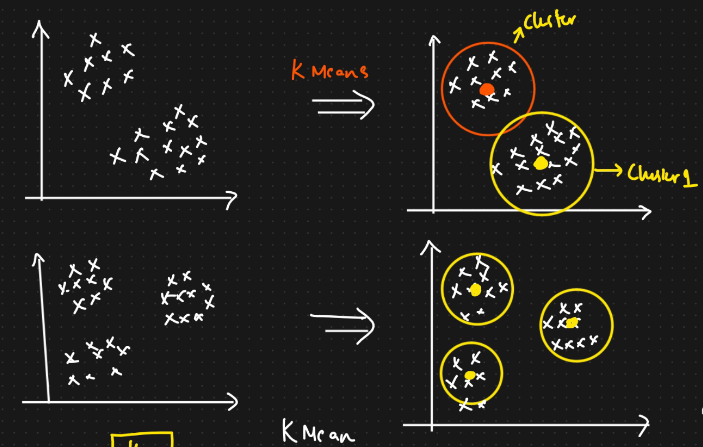

- After applying the K means clustering on dataset, will be getting different clusters with each cluster having "Centroids"
- Cluster the similar points together is the main aim behind K Means Clustering